In this notebook, we build a random forest CLASSIFIER if a claim has ever been made. 
- RUN ORDER 4/5

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# we will use ALL features on the training set

In [4]:
df = pd.read_csv("clean_data.csv")

In [5]:
# temp = df.pop('LC')

In [6]:
# df['LC'] = temp

In [7]:
# temp = df.pop('HALC')

In [8]:
# df['HALC'] = temp

In [9]:
df.columns

Index(['is_channel_broker', 'total_pol_year', 'total_pol_held', 'max_policies',
       'max_products', 'canceled_policies', 'is_halfyearly', 'net_premium',
       'risk_type', 'is_urban', 'is_multidriver', 'regis_year', 'horsepower',
       'cylinder_cap', 'market_value', 'door_count', 'is_petrol',
       'vehicle_weight', 'pol_start_day', 'pol_start_month', 'pol_start_year',
       'last_renewal_day', 'last_renewal_month', 'last_renewal_year',
       'next_renewal_day', 'next_renewal_month', 'next_renewal_year',
       'license_issue_date_day', 'license_issue_date_month',
       'license_issue_date_year', 'is_youngin', 'is_adult', 'is_middleaged',
       'is_old', 'LC', 'HALC', 'made_claim'],
      dtype='object')

In [10]:
a = len(df); a

37451

In [11]:
Q1 = df['HALC'].quantile(0.25)
Q3 = df['HALC'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['HALC'] >= lower_bound) & (df['HALC'] <= upper_bound)]

In [12]:
Q1 = df['LC'].quantile(0.25)
Q3 = df['LC'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['LC'] >= lower_bound) & (df['LC'] <= upper_bound)]

In [13]:
b = len(df); b

33300

In [14]:
(a - b) / a

0.11083816186483672

In [15]:
X = df.drop(columns='made_claim')
y = df['made_claim']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
rf_CS = RandomForestClassifier(
    n_estimators=100, random_state=42
)

In [18]:
rf_CS.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_CS.predict(X_test)
y_proba = rf_CS.predict_proba(X_test)[:, 1]

- made_claim CS accuracy: 77%
- ROCAUC: 85%

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1894  894]
 [ 634 3238]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      2788
           1       0.78      0.84      0.81      3872

    accuracy                           0.77      6660
   macro avg       0.77      0.76      0.76      6660
weighted avg       0.77      0.77      0.77      6660



In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba); auc_score

0.8481754190035217

In [23]:
y_proba

array([0.91, 0.53, 0.56, ..., 0.74, 0.57, 0.09])

In [24]:
import joblib
joblib.dump(rf_CS, 'predict_CS.pkl')

['predict_CS.pkl']

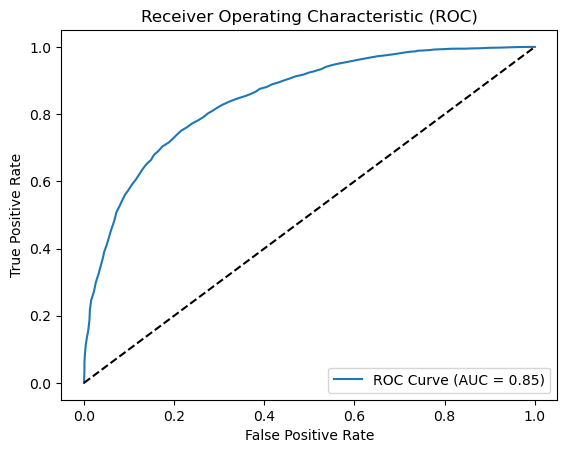

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
# plt.grid()
plt.show()



In [26]:
X_test

,is_channel_broker,total_pol_year,total_pol_held,max_policies,max_products,canceled_policies,is_halfyearly,net_premium,risk_type,is_urban,...,next_renewal_year,license_issue_date_day,license_issue_date_month,license_issue_date_year,is_youngin,is_adult,is_middleaged,is_old,LC,HALC
22288,0,11,2,4,1,1,0,254.92,3,0,...,2017,10,2,1989,0,0,1,0,0.0,0.0
13561,1,4,1,1,1,1,0,384.99,3,1,...,2019,24,9,1990,0,0,1,0,0.0,0.0
34036,0,14,1,1,1,0,1,241.66,3,0,...,2019,4,2,1987,0,0,0,1,0.0,0.0
23309,0,11,1,1,1,0,0,208.87,3,0,...,2019,2,6,1992,0,0,1,0,0.0,0.0
6398,0,1,1,1,1,0,0,330.90,3,0,...,2019,30,9,1991,0,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33698,1,9,5,5,1,1,1,310.46,2,0,...,2019,22,6,1993,0,0,1,0,0.0,0.0
13805,1,1,1,1,1,0,0,219.12,2,0,...,2019,1,1,1986,0,0,0,1,0.0,0.0
26681,1,4,1,1,1,1,0,376.72,3,0,...,2018,5,6,1975,0,0,1,0,0.0,0.0
30449,0,4,1,1,1,0,1,303.67,3,0,...,2019,27,6,1991,0,0,1,0,0.0,0.0
